# Evaluate planing quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics

import os
import re
import glob

from skimage import io

In [2]:
#root = r'E:\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Registration_user_study'
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\64_radiographic_workflow\Planning_user_study'

In [3]:
anonymize = False
save_figures = True

In [4]:
animals = os.listdir(root)
animals

['P1_H_B6_M52',
 'P1_H_B6_M57',
 'P1_H_B6_M61',
 'P1_H_C3H_M46',
 'P1_H_C3H_M48',
 'P1_H_C3H_M54',
 'P1_H_C3H_M58',
 'P2E_M11',
 'P2E_M14',
 'P2E_M2']

In [5]:
animal = 'P1_H_C3H_M54'
plan_files = glob.glob(os.path.join(root, animal, '*.tif'))

In [16]:
plans = [io.imread(file)[0] for file in plan_files]
plan_stack = np.stack(plans)
plan_fused = np.asarray(stats.mode(plan_stack, axis=0))[0].squeeze()

Text(0.5, 1.0, 'Fusion')

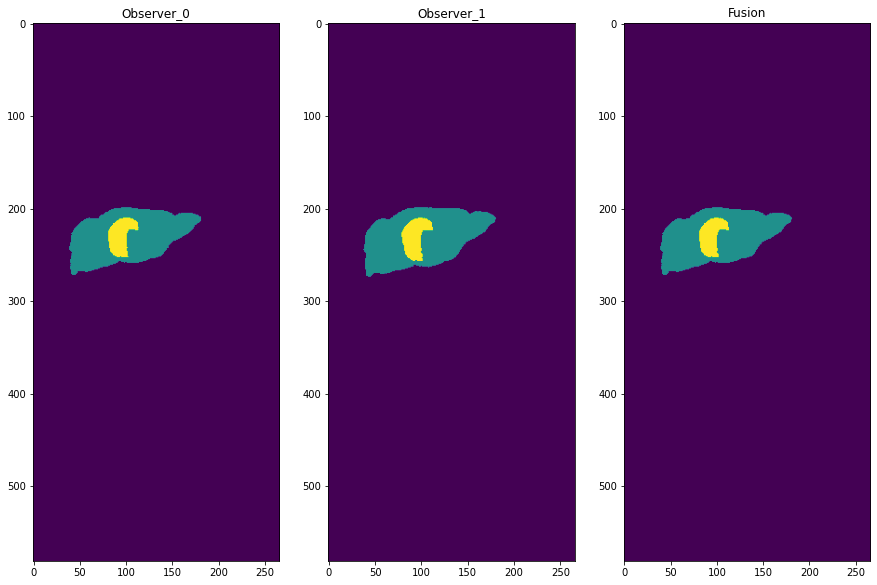

In [17]:
fig, ax = plt.subplots(ncols = len(plans)+1, figsize = (15, 10))
[ax[i].imshow(plan) for i, plan in enumerate(plans)]
[ax[i].set_title(f'Observer_{i}') for i in range(len(plans))]
ax[-1].imshow(plan_fused)
ax[-1].set_title('Fusion')

In [18]:
# Label-wise jaccard score
for plan in plans:
    JC = metrics.jaccard_score(plan_fused.flatten(), plan.flatten(), average=None)
    print(JC)

[0.99979732 0.9884474  0.95913734]
[0.99682471 0.90541199 0.88296761]
